# Kmeans from scratch

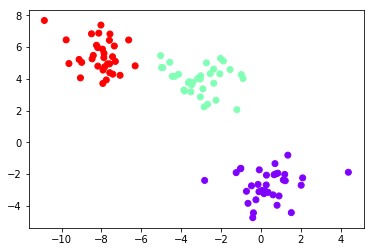

In [148]:
from scipy.spatial.distance import cdist    
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def distance(k,k1):
    dist = cdist(k,k1,'euclidean') # this will help us to get the euclidean distance b/w random center and datapoints
    newpoint = np.argmin(dist,axis=1)# this will give us the label for ploting the graph
    return newpoint

def scatterplot(k,newpoint):
    return plt.scatter(k[:,0],k[:,1],c=newpoint,cmap="rainbow")# plot the graph
    
def nwpoint(newpoint):
    n_values = np.max(newpoint)+1# this line is giving us counting from 1 because we have from 0 
    hot_encoding = np.eye(n_values)[newpoint]#using np.eye for encoding the datapoints
    z=np.dot(hot_encoding.T,k)# inorder to get the sum of each cluster in different column 
    k1 = (z.T/sum(hot_encoding)).T # divide the sum from total points in order to get new centroid
    return k1
    

k,y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0))    
k1,k2 = make_blobs(n_samples=3, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0)) 
plt.scatter(k[:,0],k[:,1],c=y,cmap="rainbow")

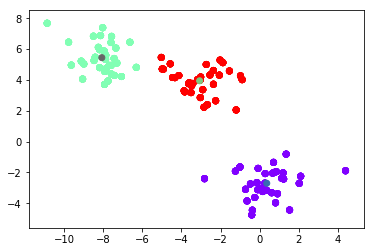

In [149]:
for i in range(0,10):
    newpoints= distance(k,k1)
    scatterplot(k,newpoints)
    k1=nwpoint(newpoints)
plt.scatter(k1[:,0],k1[:,1],c=k2,cmap="Accent")